1/1 [==============================] - 0s 149ms/step


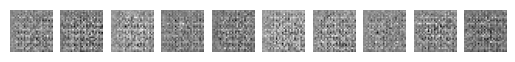

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

generator = keras.Sequential([
    layers.Dense(7 * 7 * 256, input_shape=(100,)),
    layers.LeakyReLU(alpha=0.2),
    layers.Reshape((7, 7, 256)),
    layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'),
])

discriminator = keras.Sequential([
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.3),
    layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid'),
])

num_images = 10
noise = np.random.normal(0, 1, (num_images, 100))
generated_images = generator.predict(noise)

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()